<a href="https://colab.research.google.com/github/lopesrosiane/-Processamento-de-Imagens-e-Visao-Computacional-/blob/main/CNN%20com%20dataset%20MNIST/AV3_Redes_Neurais_modelo_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table>

<tr>
</tr>
<tr>
<td>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/QD1QS5g/Ufopa-braso-PNG-fundo-transparente-reduzida.png" alt="Ufopa-braso-PNG-fundo-transparente-reduzida" border="0"></a>

</td>


<td>

|**UFOPA**|
------------------------------------------|
| *Campus de Oriximiná* |
| *SISTEMAS DE INFORMAÇÃO* |
| Docente: Esp. Danilo Azevedo Figueiredo |
| Disciplina: **REDES NEURAIS** |
|**AVALIAÇÃO 3**: VISÃO COMPUTACIONAL COM REDES NEURAIS CONVOLUCIONAIS (CNN)|

</td>
</tr>

</table>


---
### Aluno 1:
### Aluno 2:
### Aluno 3:
### Data de entrega: 23/10/2024, até 23:59h, pelo SIGAA.

---
# **AV.3 - VISÃO COMPUTACIONAL COM REDES NEURAIS CONVOLUCIONAIS (CNN)**

## **Código 1 (Mostrar imagens do dataset MNIST)**

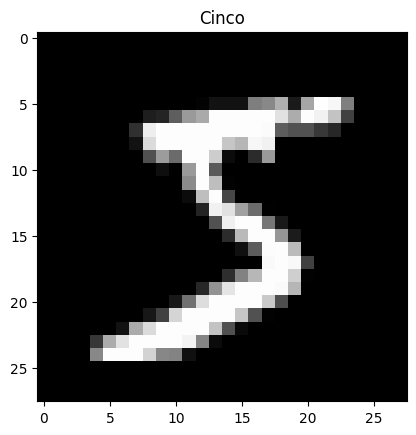

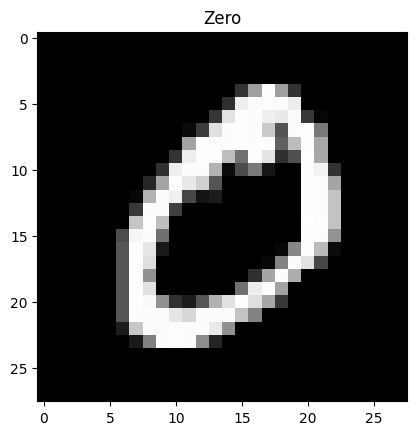

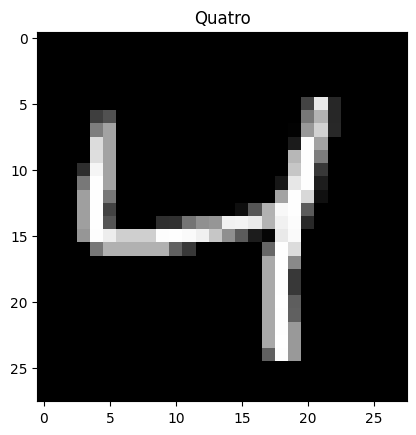

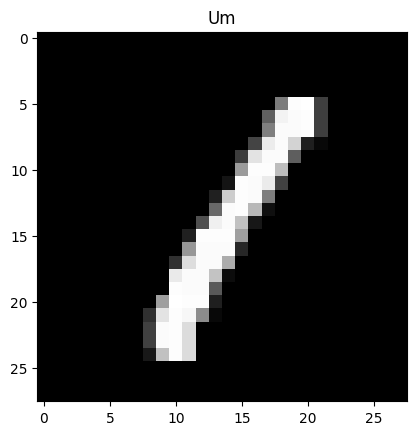

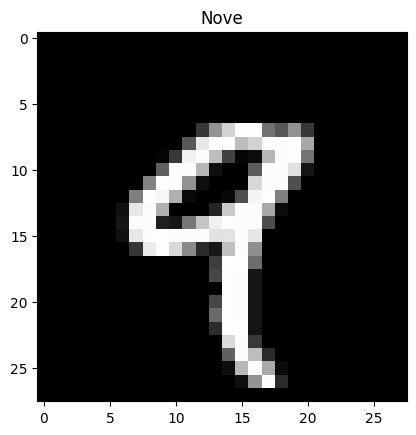

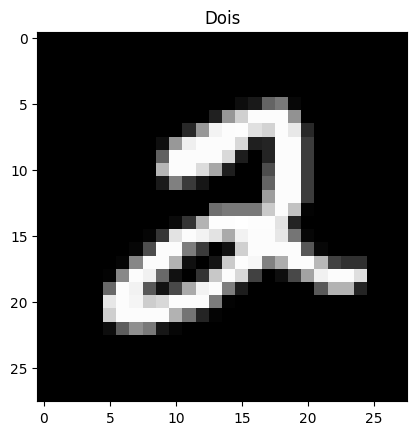

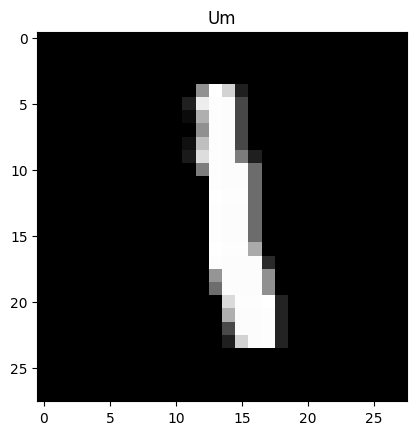

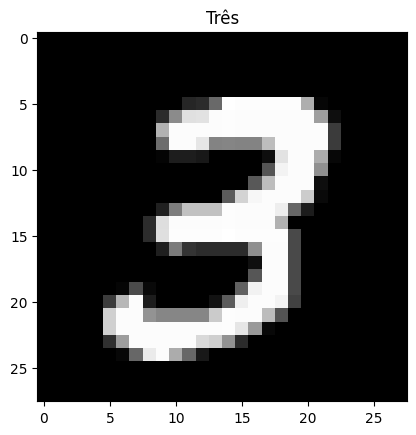

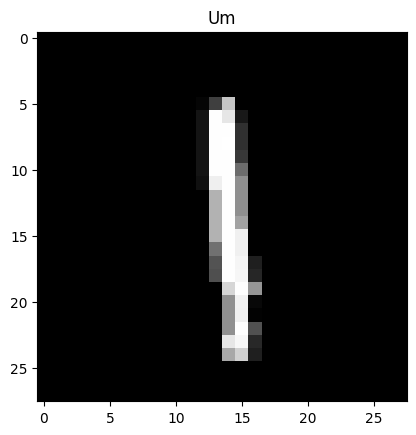

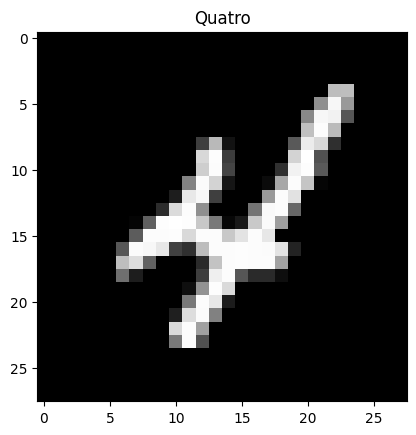

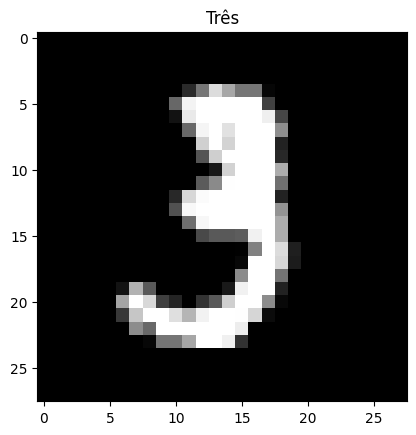

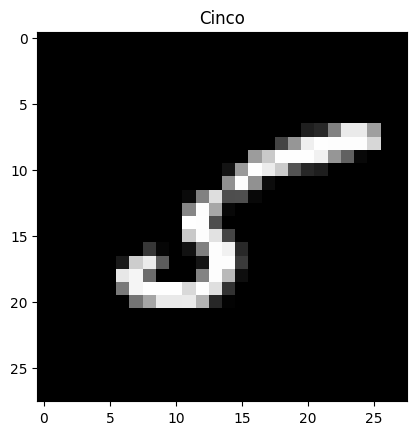

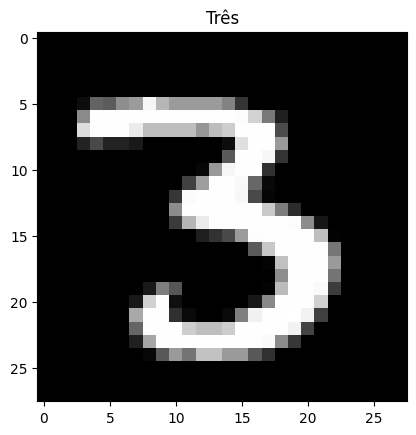

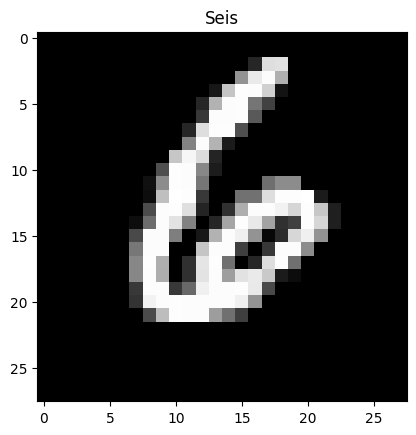

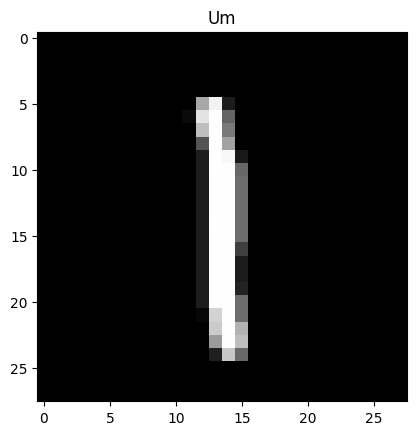

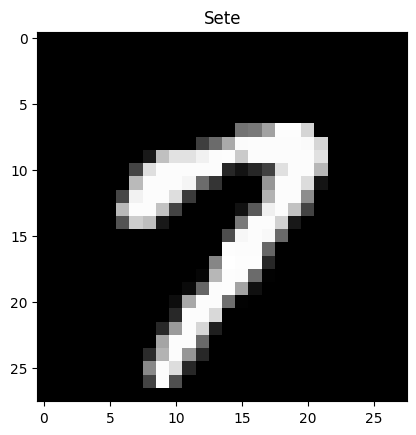

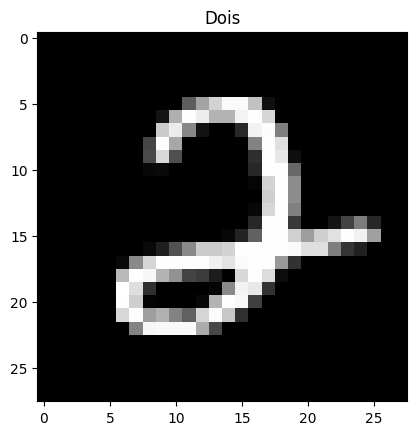

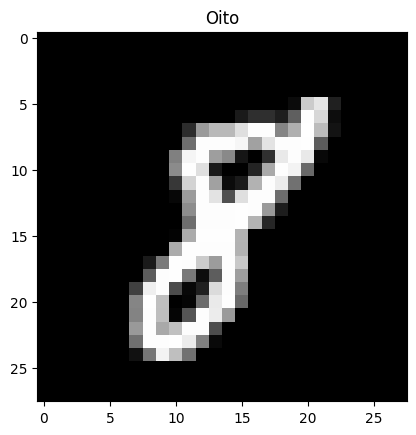

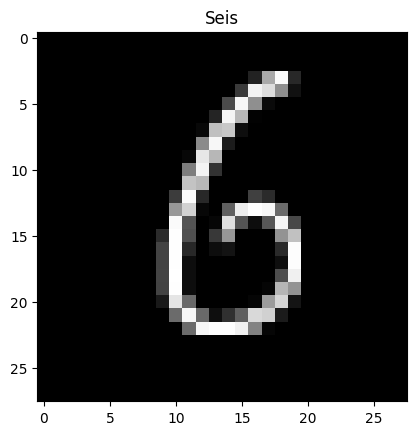

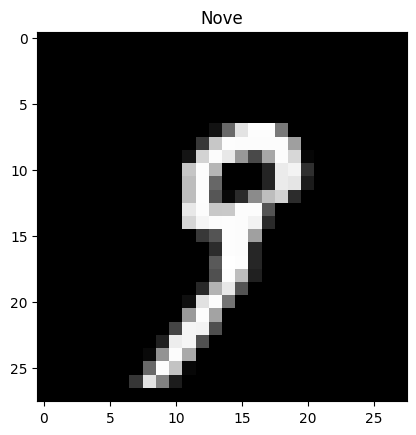

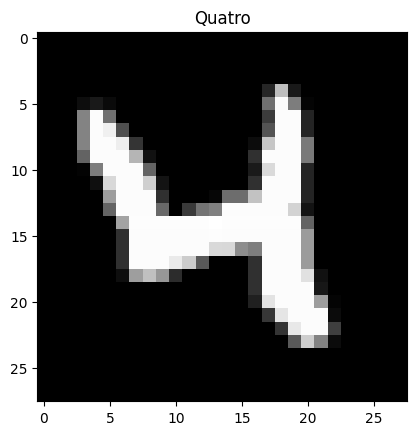

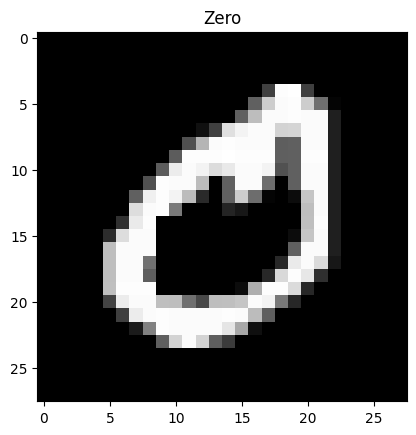

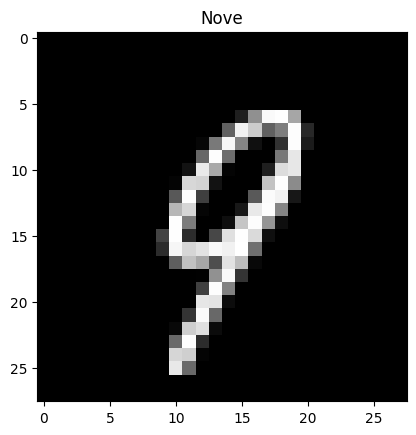

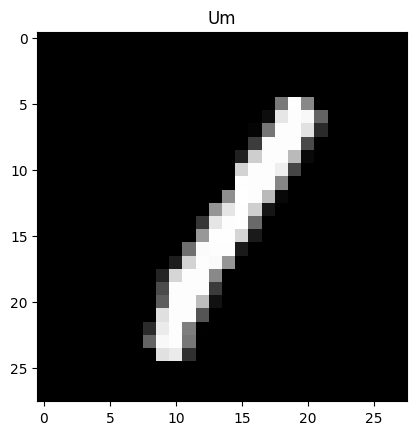

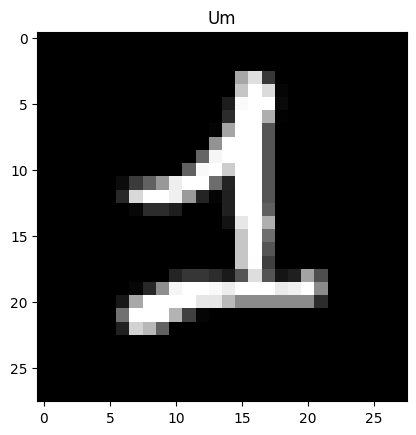

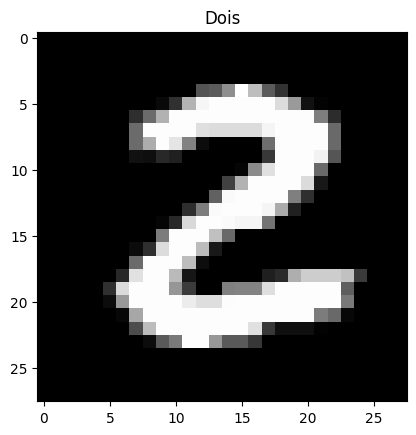

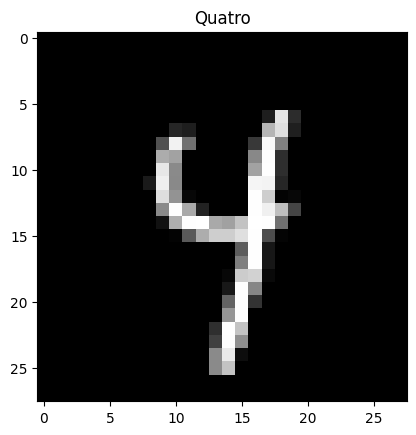

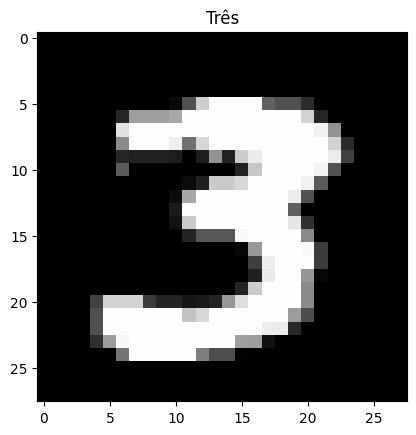

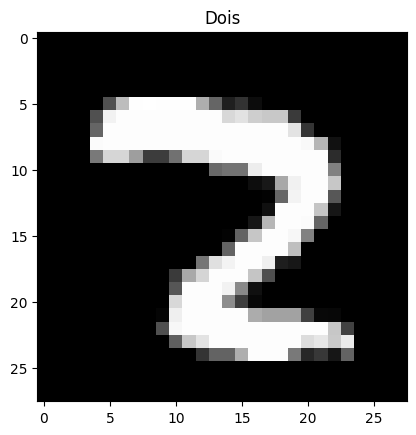

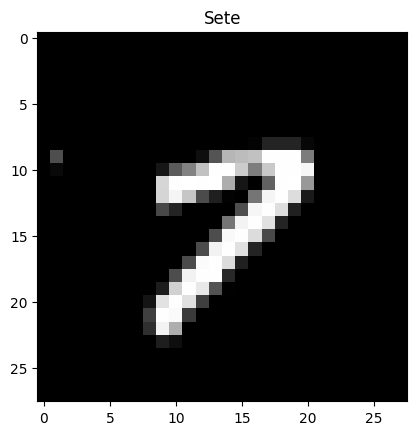

In [4]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Lista de nomes para cada classe do dataset MNIST (dígitos de 0 a 9)
mnist_class_names = {
    0: "Zero",
    1: "Um",
    2: "Dois",
    3: "Três",
    4: "Quatro",
    5: "Cinco",
    6: "Seis",
    7: "Sete",
    8: "Oito",
    9: "Nove"
}

# Carregar o dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Varredura em cada imagem no dataset
for i in range(30):  # mostrando apenas 30 imagens do dataset
    # Pegar uma imagem do dataset
    sample_image = x_train[i]
    # Pegar o id da classe associada à imagem
    image_class_number = y_train[i]
    # Procurar o nome da classe baseado no id da classe
    image_class_name = mnist_class_names[image_class_number]

    # Plotar a imagem
    plt.imshow(sample_image, cmap='gray')  # Usar cmap='gray' para exibir em escala de cinza
    # Rotular a imagem
    plt.title(image_class_name)
    # Mostrar o plot na tela
    plt.show()


---


## **Código 2 (TREINAR uma CNN usando o dataset MNIST)**

In [6]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
import keras

# O dataset MNIST possui 70.000 imagens de números, de 0 a 9.

# Carregar o dataset MNIST nos conjuntos de TREINO (60.000) e de TESTE (10.000)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Ajustar as dimensões do dataset para (28, 28, 1) e normalizar os valores
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

# Converter os rótulos de classe para vetores one-hot encoded
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Criar o modelo de CNN e adicionar as camadas
model = Sequential()

# Camada de ENTRADA explícita, que define o formato da entrada (28x28 e 1 canal)
camada_entrada = (28, 28, 1)
K = 3  # Tamanho do kernel
P = 2  # Tamanho do pooling

# Camadas de convolução e pooling
model.add(Conv2D(32, (K, K), padding='same', input_shape=camada_entrada, activation="relu"))
model.add(Dropout(0.25))
model.add(Conv2D(32, (K, K), activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(P, P)))

model.add(Conv2D(64, (K, K), padding='same', activation="relu"))
model.add(Dropout(0.25))
model.add(Conv2D(64, (K, K), activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(P, P)))

# Camada de Flattening (achatamento das matrizes)
model.add(Flatten())

# Exibir o resumo do modelo
resumo_modelo = model.summary()

# Quatidade de neurônios na camada densa (de acordo com a saída na camada de achatamento (Flatten))
# camada_densa = int(input("Digite a quantidade de neurônios na camada densa: "))
camada_densa = model.layers[-1].output.shape[1]   # Acessa a forma da saída através do atributo 'output'
print(f"Número de neurônios da camada densa: {camada_densa}")

# Deep Learning - Várias camadas densas dentro da camada oculta da Rede Neural (fully connected)
model.add(Dense(camada_densa, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(camada_densa, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(camada_densa, activation="relu"))
model.add(Dropout(0.5))

# Camada de saída com 10 classes (de 0 a 9)
model.add(Dense(10, activation="softmax"))

# Exibir o resumo do modelo
model.summary()

# Compilar o modelo de uma CNN
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Treinamento do modelo de uma CNN
model.fit(
    x_train,
    y_train,
    batch_size=200,
    epochs=20,
    validation_data=(x_test, y_test),
    shuffle=True
)

# Salvar a estrutura do modelo da rede neural
model_structure = model.to_json()
f = Path("model_structure.json")
f.write_text(model_structure)

# Salvar os pesos da rede neural
model.save_weights("model.weights.h5")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,992 (253.88 KB)

 Trainable params: 64,992 (253.88 KB)

 Non-trainable params: 0 (0.00 B)

Número de neurônios da camada densa: 1600


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1600)                │       2,561,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1600)                │       2,561,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1600)                │       2,561,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,765,802 (29.62 MB)

 Trainable params: 7,765,802 (29.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.7769 - loss: 0.6410 - val_accuracy: 0.9838 - val_loss: 0.0847
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9794 - loss: 0.0717 - val_accuracy: 0.9866 - val_loss: 0.0480
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9835 - loss: 0.0556 - val_accuracy: 0.9900 - val_loss: 0.0390
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9873 - loss: 0.0443 - val_accuracy: 0.9911 - val_loss: 0.0342
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9877 - loss: 0.0416 - val_accuracy: 0.9927 - val_loss: 0.0293
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9901 - loss: 0.0340 - val_accuracy: 0.9920 - val_loss: 0.0290
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9904 - loss: 0.0330 - val_accuracy: 0.9922 - val_loss: 0.0269
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9915 - loss: 0.0294 - val_acc

---

## **Código 3 (CLASSIFICAR os números contidos nas imagens de teste)**

In [10]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import numpy as np
import matplotlib.pyplot as plt

# As classes do dataset MNIST são simplesmente os dígitos de 0 a 9
rotulos_das_classes = {
    0: "Zero",
    1: "Um",
    2: "Dois",
    3: "Três",
    4: "Quatro",
    5: "Cinco",
    6: "Seis",
    7: "Sete",
    8: "Oito",
    9: "Nove"
}

# Carregar o arquivo json que contém o modelo estruturado da rede neural
f = Path("model_structure.json")
model_structure = f.read_text()

# Recriar o modelo da rede neural
model = model_from_json(model_structure)

# Recarregar os pesos treinados do modelo de rede neural
model.load_weights("model.weights.h5")

# Lista com o nome dos arquivos das imagens dos dígitos 0 a 9
arquivos_de_imagens = [
    "0.jpg", "1.jpg", "2.jpg", "3.jpg", "4.jpg",
    "5.jpg", "6.jpg", "7.jpg", "8.jpg", "9.jpg"
]

# Lista para armazenar as imagens processadas
lista_de_imagens_para_classificar = []

# Carregar e processar as imagens
for arquivo in arquivos_de_imagens:
    # Carregar a imagem, redimensionando-a para 28x28 pixels
    img = image.load_img(arquivo, color_mode="grayscale", target_size=(28, 28))

    # Converter a imagem para um array numpy e normalizar os valores (0 a 1)
    image_to_test = image.img_to_array(img) / 255.0

    # Adicionar a imagem processada à lista
    lista_de_imagens_para_classificar.append(image_to_test)

# Converter a lista de imagens para um array numpy e adicionar a quarta dimensão (batch size)
lista_de_imagens_para_classificar = np.array(lista_de_imagens_para_classificar)

# Fazer a predição usando o modelo
resultados = model.predict(lista_de_imagens_para_classificar)

# Mostrar as imagens e os resultados, aguardando o pressionar de Enter para cada uma
for i, resultado_unico in enumerate(resultados):
    # Mostrar a imagem
    img = image.load_img(arquivos_de_imagens[i], color_mode="grayscale", target_size=(28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(f"Imagem {i} ({arquivos_de_imagens[i]})")
    plt.show()

    # Mostrar as probabilidades para cada classe
    print("Probabilidades para cada classe:")
    for j, prob in enumerate(resultado_unico):
        print(f"{rotulos_das_classes[j]}: {prob:.2f}")

    # Calcular a classe mais provável
    indice_da_classe_mais_provavel = int(np.argmax(resultado_unico))
    probabilidade_da_classe = resultado_unico[indice_da_classe_mais_provavel]

    # Pegar o nome da classe mais provável (o dígito)
    classe = rotulos_das_classes[indice_da_classe_mais_provavel]

    # Mostrar o resultado da classe mais provável
    print(f"Esta imagem mostra o dígito {classe} - Probabilidade: {probabilidade_da_classe:.2f}")

    # Pausar e esperar o usuário apertar Enter antes de ir para a próxima imagem
    input("\n\nPressione Enter para continuar para a próxima imagem...\n")


FileNotFoundError: [Errno 2] No such file or directory: '0.jpg'